# Revenue Management Basics

In [127]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import Bounds, minimize

## Price Elasticity of Demand

Notes from [online overview](http://www.economicsdiscussion.net/price-elasticity-of-demand/price-elasticity-of-demand-with-formula/25223):

Elasticity is the response of one variable, such as quantity demanded, to change in another variable, such as price.

The quantity demanded of a commodity is affected by a large number of variables. Elasticity of demand measures the degree of responsiveness of quantity demanded of a commodity to a change in one of the variables affecting demand (i.e., to a change in any one of the demand determinants). The response to change in each influencing variable is measured by a separate elasticity concept. We may start with the most commonly encountered of all elasticities, viz., and price elasticity of demand.

If a change in price leads to a large enough change in quantity demanded that lowering the price results in a higher revenue, then demand for the commodity is said to be elastic, if it results in equal revenue it is said to have unit elasticity, if lower revenue it is inelastic. If the change in quantity demanded is relatively small, demand is said to be inelastic.

- Coefficient of price elasticity of demand = $(E_p)$
- Qualtity demanded = $Q$
- Price = $P$

$$
E_p = \frac{\frac{\Delta Q}{Q}} {\frac{\Delta P}{P}}
$$

Description | Elasticity Coeff
---|---
Elastic | $E_p > 1$
Unit | $E_p = 1$
Inelastic | $E_p < 1$

Note: Demand change (v change in quantity demanded) is when the intercept of the demand curve shifts

Note: All demands are theoretically negative, but by convention negative sign is left off

In [132]:
def price_elasticity_of_demand(base_q, delta_q, base_p, delta_p):
    peod = (delta_q / base_q) / (delta_p / base_p)
    return peod

print('inelastic example')
print(price_elasticity_of_demand(100, 5, 100, -7))

print('\nelastic example')
print(price_elasticity_of_demand(100, 5, 100, -3))

inelastic example
-0.7142857142857143

elastic example
-1.6666666666666667


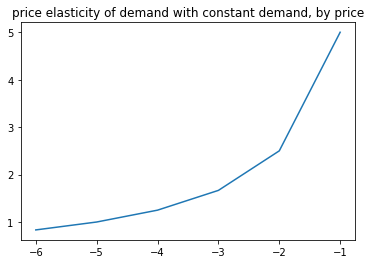

In [28]:
delta_p = np.arange(1, 7, 1) * -1

peod = [price_elasticity_of_demand(100, -5, 100, dp) for dp in delta_p]

plt.plot(delta_p, peod)
plt.title('price elasticity of demand with constant demand, by price')
plt.show()

## Maximizing Revenue with Single Rate

Optimal Price Point: 166.67


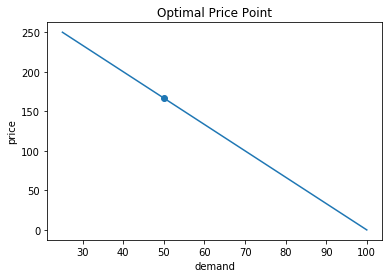

Note: In reality, we would expect the demand to be a curved line, 
with more elasticity at higher prices, less elasticity at lower prices.


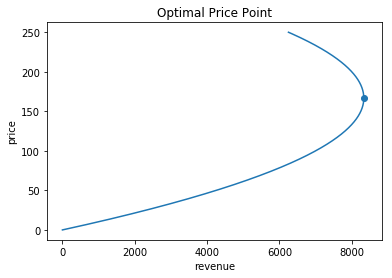

In [136]:
def linear_demand(p, slope, intercept):
        return p * slope + intercept
    
def revenue(p, slope, intercept):
    return p * linear_demand(p, slope, intercept)

def neg_assumed_revenue(p):
    return -1 * revenue(p, assumed_slope, assumed_intercept)

assumed_slope = -.3
assumed_intercept = 100

minimization = minimize(neg_assumed_revenue, np.array([200]), 
                        method='L-BFGS-B', bounds=Bounds([0], [np.inf]))

print('Optimal Price Point: ' + str(round(minimization['x'][0], 2)))

prices = np.arange(0, minimization['x'] * 1.5, .001)
plt.title('Optimal Price Point')
plt.xlabel('demand')
plt.ylabel('price')
plt.plot([linear_demand(p, assumed_slope, assumed_intercept) for p in prices], prices)
plt.scatter(linear_demand(minimization['x'], assumed_slope, assumed_intercept), minimization['x'])
plt.show()

print('Note: In reality, we would expect the demand to be a curved line, \nwith more elasticity at higher prices, less elasticity at lower prices.')

plt.title('Optimal Price Point')
plt.xlabel('revenue')
plt.ylabel('price')
plt.plot([neg_assumed_revenue(p) * -1 for p in prices], prices)
plt.scatter(neg_assumed_revenue(minimization['x']) * -1, minimization['x'])
plt.show()



## Market Segmentation

Since revenue is area under the curve (rectangle from origin to optimal price in price demand chart), 
and total demand is area of triangle between the origin, the x intercept and the y intercept. Using a single price misses demand at prices above optimal price point, and below optimal price point (top of triangle and left of triangle, respectively). So use segmentation to introduce higher and lower prices that prevent customers from moving between segments. In economics this is called price discrimination.

### Segmentation fencing examples:
- 21 day advanced purchase requirement
- saturday stay requirement
- business contract
- etc

## Elasticity Analysis
- At the optimal price, $P_e = 1$, which means the demand in the corresponding rectangle is said to have unit elasticity
  - Increasing or decreasing the rate will decrease revenue
- The demand above the rectangle has $P_e > 1$, and is said to be elastic
  - Increasing these rates will decrease revenue
  - Decreasing these rates will increase revenue
- The demand below the rectangle has $P_e < 1$, and is said to be inelastic
  - Increasing these rates will increase revenue
  - Decreasing these rates will decrease revenue

## Maximizing Revenue with Multiple Rates